In [9]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt



from numpy import genfromtxt
# my_data = genfromtxt('C:\\Users\\tnguyen\\projects\\work\\220_2layerdb_bathymetry_16.csv', delimiter=',')
FH = np.loadtxt('C:\\Users\\tnguyen\\projects\\work\\220_2layerdb_bathymetry_16.csv', delimiter=',', skiprows=1)


In [15]:
src_id = FH[:,0].astype(int)
rec_id = FH[:,1].astype(int)
src_xline = FH[:,2].astype(float)
src_iline = FH[:,3].astype(float)
rec_xline = FH[:,4].astype(float)
rec_iline = FH[:,5].astype(float)
rec_z = FH[:,6].astype(float)
offset = FH[:,7].astype(float)
da_time = FH[:,8].astype(float)


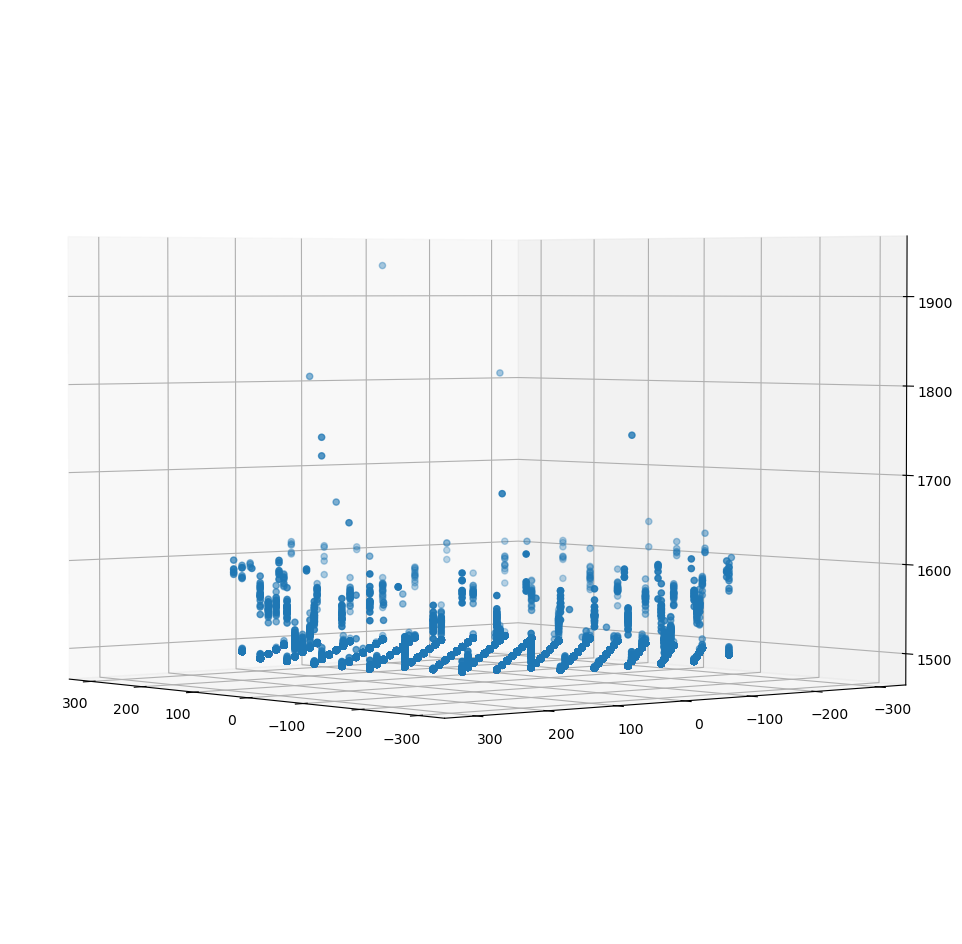

In [41]:

dist = np.sqrt((rec_z - 6)**2 + offset**2)
vmean = dist/da_time
xdiff = src_xline - rec_xline
idiff = src_iline - rec_iline

#plt.scatter(idiff, dist/da_time)
#plt.figure()
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(xdiff, idiff, vmean)
ax.view_init(elev=2., azim=140)

1216
960
960
960
960
1860
900
900
900
900
1796
896
896
896
896
2576
1680
1680
1680
1680
1680
1680
1680
1680
2464
784
784
784
1616
832
832
832
2392
1560
1560
1560
1560
1560
1560
1560
1560
3016
1456
1456
1456
1456
1456
1456
2224
768
768
768
2208
1440
1440
1440
1440
1440
1440
1440
2116
676
676
676
2020
1344
1344
1344
1344
1344
1344
3296
1952
1952
1952
1952
1952
1952
1952
1952
1952
3272
1320
1320
1320
1320
1320
1320
2552
1232
1232
1232
1232
1232
1232
1808
576
576
655
[1497.0217591  1497.02561833 1497.02561833 1497.02561833 1497.02561833
 1497.03416857 1497.04328882 1497.04328882 1497.04328882 1497.04328882
 1497.0660674  1497.08894768 1497.08894768 1497.08894768 1497.08894768
 1497.10393052 1497.11192137 1497.11192137 1497.11192137 1497.11192137
 1497.11192137 1497.11192137 1497.11192137 1497.11192137 1497.15939388
 1497.26112071 1497.26112071 1497.26112071 1497.46023677 1497.64786537
 1497.64786537 1497.64786537 1497.52200156 1497.4548742  1497.4548742
 1497.4548742  1497.4548742  1497.45

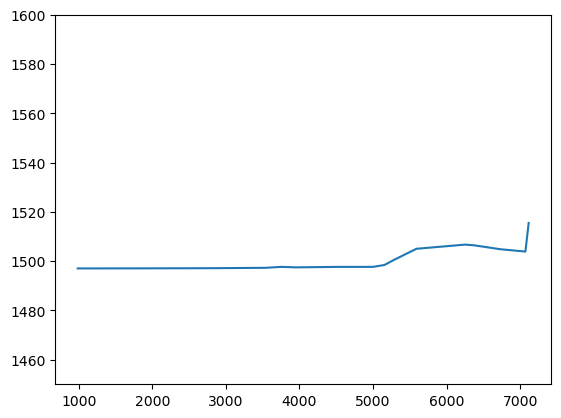

In [87]:
azim = np.arctan2(xdiff, idiff)
# plt.scatter(dist, vmean)
#plt.hist(offset)
N = 100
x = np.percentile(offset, np.linspace(1,N,N))
offs = np.zeros(N-1)
mvel = np.zeros(N-1)
for i in range(0,N-1):
    # print(i)
    x1 = x[i]
    x2 = x[i+1]

    sel = np.logical_and(offset >= x1, offset <=x2 )
    print(np.sum(sel))
    offs[i] = np.mean(offset[sel])
    mvel[i] = np.mean(vmean[sel])


plt.plot(offs, mvel)  
ax = plt.gca()
ax.set_ylim([1450, 1600])

print(mvel)

In [97]:
def detect_grid(coords):
    ucoord = list(set(coords))
    ucoord.sort()
    return ucoord[0], ucoord[1]-ucoord[0], len(ucoord)

xlstart, xlstep, nxl = detect_grid(src_xline)
print(xlstart, xlstep, nxl)


tmp = np.array([1,2,3])
tmp.resize((2,2,2))

print(tmp)
print(tmp[1,:,:])

1000.0 50.0 16
[[[1 2]
  [3 0]]

 [[0 0]
  [0 0]]]
[[0 0]
 [0 0]]
